# SQUAD Datathon

This is a starter python notebook to get you going! The code shown here is basic and it is expected that you create visualizations much more beautiful than these boring ones :(  
The starter notebook only contains some examples for Exploratory Data Analysis (EDA). To know more about modelling, please look into this library called <a href="https://scikit-learn.org/stable/">scikit-learn</a>.

# Import Libraries

Python is a versatile language because of the various packages created by developers. In this section, data science libraries such as pandas matplotlib and seaborn are imported.  
1. Pandas: Used to work with csv, xlsx, tsv and many more such data files. You can use this library to perform all kinds of operations on data (filter, locate, slice, and much more).  
2. Matplotlib: Used to create all kinds of visualizations.  
3. Seaborn: Same as matplotlib (it is not necessary to use this notebook but I find seaborn quite easy).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
# this is how you can comment in python and from here on, you'll mostly see comments in the code
# first step is to read the datasets
train = pd.read_csv("./train.csv") # make sure you use the absolute path to the file

train.head() # this is how you print the first 5 rows of the dataset

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
0,Female,18,Urban,Greater than 3,Apart,at_home,teacher,mother,25,2,...,yes,no,no,4,3,4,1,1,6,0.30
1,Male,16,Urban,Greater than 3,Together,health,other,father,10,2,...,yes,yes,no,4,2,4,2,4,2,0.65
2,Male,15,Urban,Greater than 3,Together,other,teacher,father,25,2,...,yes,no,no,4,4,3,1,1,2,0.70
3,Male,16,Urban,Less than 3,Together,other,other,mother,10,2,...,yes,yes,yes,4,2,3,1,2,0,0.80
4,Female,17,Urban,Less than 3,Together,services,services,father,10,4,...,yes,yes,yes,3,4,1,1,1,0,0.00


In [3]:
train.info() # this is how you print the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               835 non-null    object 
 1   age               835 non-null    int64  
 2   address           835 non-null    object 
 3   family_size       835 non-null    object 
 4   parents_together  835 non-null    object 
 5   mother_job        835 non-null    object 
 6   father_job        835 non-null    object 
 7   guardian          835 non-null    object 
 8   travel_time       835 non-null    int64  
 9   study_time        835 non-null    int64  
 10  failed_classes    835 non-null    int64  
 11  school_support    835 non-null    object 
 12  extra_curricular  835 non-null    object 
 13  want_higher       835 non-null    object 
 14  internet          835 non-null    object 
 15  romantic_rel      835 non-null    object 
 16  family_rel        835 non-null    int64  
 1

In [4]:
# Convert to object because value scale's different
train_map = {
    1: '1. < 2 hrs',
    2: '2. 2-5 hrs',
    3: '3. 5-10 hrs',
    4: '4. > 10 hrs'
}

train['study_time'] = train['study_time'].map(train_map)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               835 non-null    object 
 1   age               835 non-null    int64  
 2   address           835 non-null    object 
 3   family_size       835 non-null    object 
 4   parents_together  835 non-null    object 
 5   mother_job        835 non-null    object 
 6   father_job        835 non-null    object 
 7   guardian          835 non-null    object 
 8   travel_time       835 non-null    int64  
 9   study_time        835 non-null    object 
 10  failed_classes    835 non-null    int64  
 11  school_support    835 non-null    object 
 12  extra_curricular  835 non-null    object 
 13  want_higher       835 non-null    object 
 14  internet          835 non-null    object 
 15  romantic_rel      835 non-null    object 
 16  family_rel        835 non-null    int64  
 1

In [6]:
# Convert all object to category
for var in train.select_dtypes(include=['object']).columns:
    train[var] = train[var].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sex               835 non-null    category
 1   age               835 non-null    int64   
 2   address           835 non-null    category
 3   family_size       835 non-null    category
 4   parents_together  835 non-null    category
 5   mother_job        835 non-null    category
 6   father_job        835 non-null    category
 7   guardian          835 non-null    category
 8   travel_time       835 non-null    int64   
 9   study_time        835 non-null    category
 10  failed_classes    835 non-null    int64   
 11  school_support    835 non-null    category
 12  extra_curricular  835 non-null    category
 13  want_higher       835 non-null    category
 14  internet          835 non-null    category
 15  romantic_rel      835 non-null    category
 16  family_rel        835 non-

In [7]:
train.nunique()

sex                  2
age                  8
address              2
family_size          2
parents_together     2
mother_job           5
father_job           5
guardian             3
travel_time          4
study_time           4
failed_classes       4
school_support       2
extra_curricular     2
want_higher          2
internet             2
romantic_rel         2
family_rel           5
free_time            5
go_out               5
workday_alcohol      5
weekend_alcohol      5
absences            32
grade               17
dtype: int64

In [8]:
for var in train.select_dtypes(include=['category']).columns:
    print(train[var].value_counts())

# data unbalanced => need to scaled later

Female    471
Male      364
Name: sex, dtype: int64
Urban    608
Rural    227
Name: address, dtype: int64
Greater than 3    594
Less than 3       241
Name: family_size, dtype: int64
Together    742
Apart        93
Name: parents_together, dtype: int64
other       309
services    196
at_home     159
teacher     106
health       65
Name: mother_job, dtype: int64
other       465
services    229
teacher      55
at_home      54
health       32
Name: father_job, dtype: int64
mother    578
father    196
other      61
Name: guardian, dtype: int64
2. 2-5 hrs     403
1. < 2 hrs     253
3. 5-10 hrs    131
4. > 10 hrs     48
Name: study_time, dtype: int64
no     741
yes     94
Name: school_support, dtype: int64
no     418
yes    417
Name: extra_curricular, dtype: int64
yes    763
no      72
Name: want_higher, dtype: int64
yes    659
no     176
Name: internet, dtype: int64
no     545
yes    290
Name: romantic_rel, dtype: int64


In [9]:
train.describe()

#data looks skew => need to scaled and centered

,age,travel_time,failed_classes,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,16.736527,18.359281,0.256287,3.934132,3.217964,3.158084,1.508982,2.305389,4.267066,0.565090
std,1.257131,12.659165,0.641449,0.937736,1.023894,1.153211,0.930874,1.303530,5.740120,0.199775
min,15.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,10.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.500000
50%,17.000000,10.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.550000
75%,18.000000,25.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,0.700000
max,22.000000,65.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,0.950000


Dataset info can help identify categorical and numerical variables. Let's move on to some plots.  
Note: Since you'll be saving your plots for the presentation, you can save them using plt.savefig() but remember to use it before plt.show().

## Numeric variables

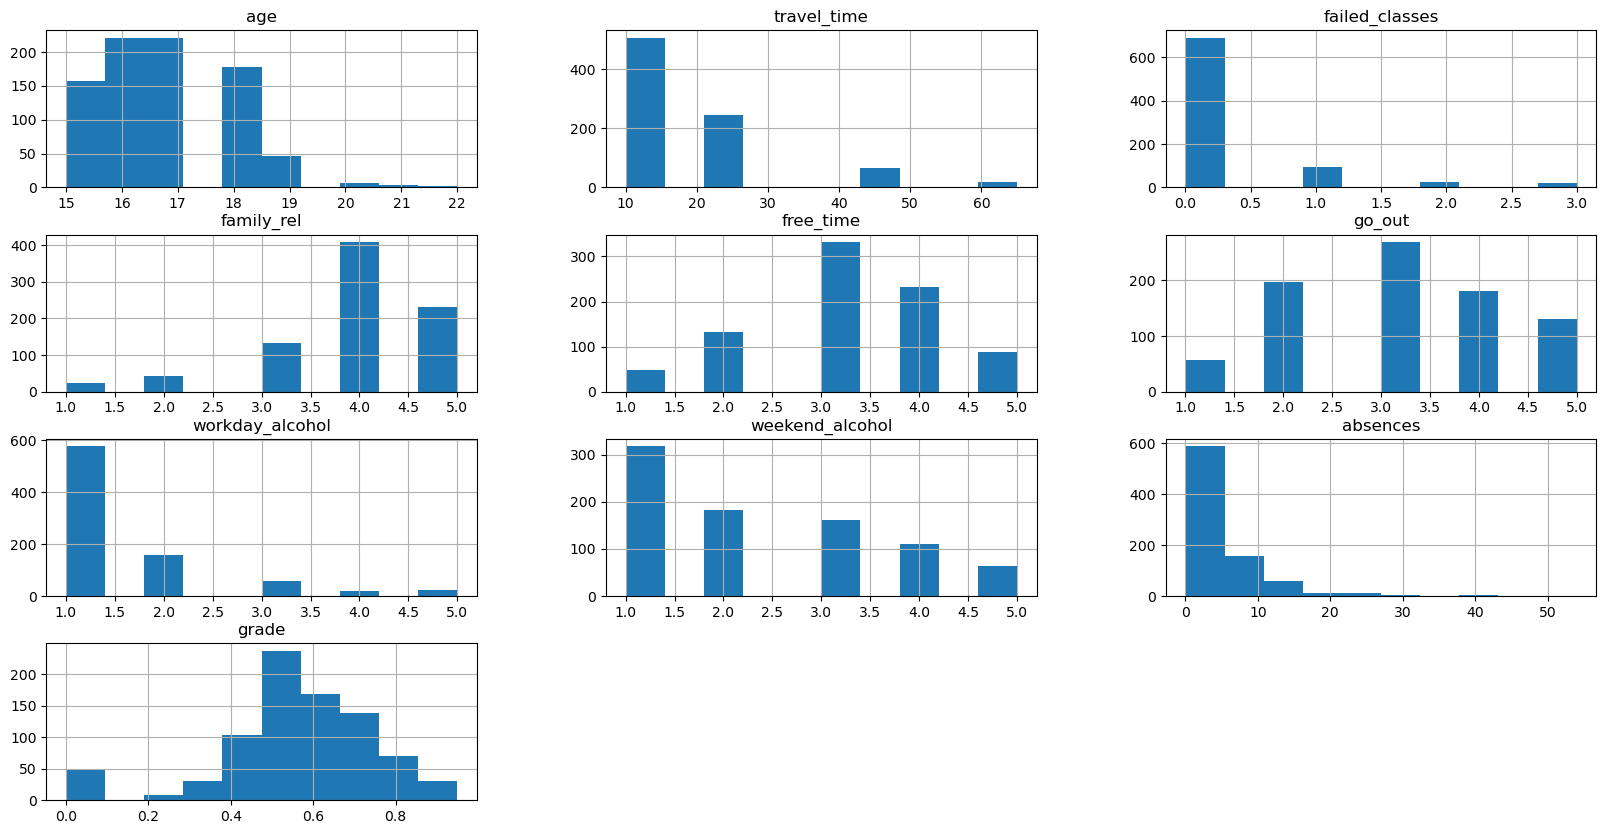

In [10]:
# numeric variable 
num_var = train.select_dtypes(include = ['float64','int64'])

train.hist(figsize=(20, 10))

plt.savefig('num_visual.png')

plt.show() # look skewed

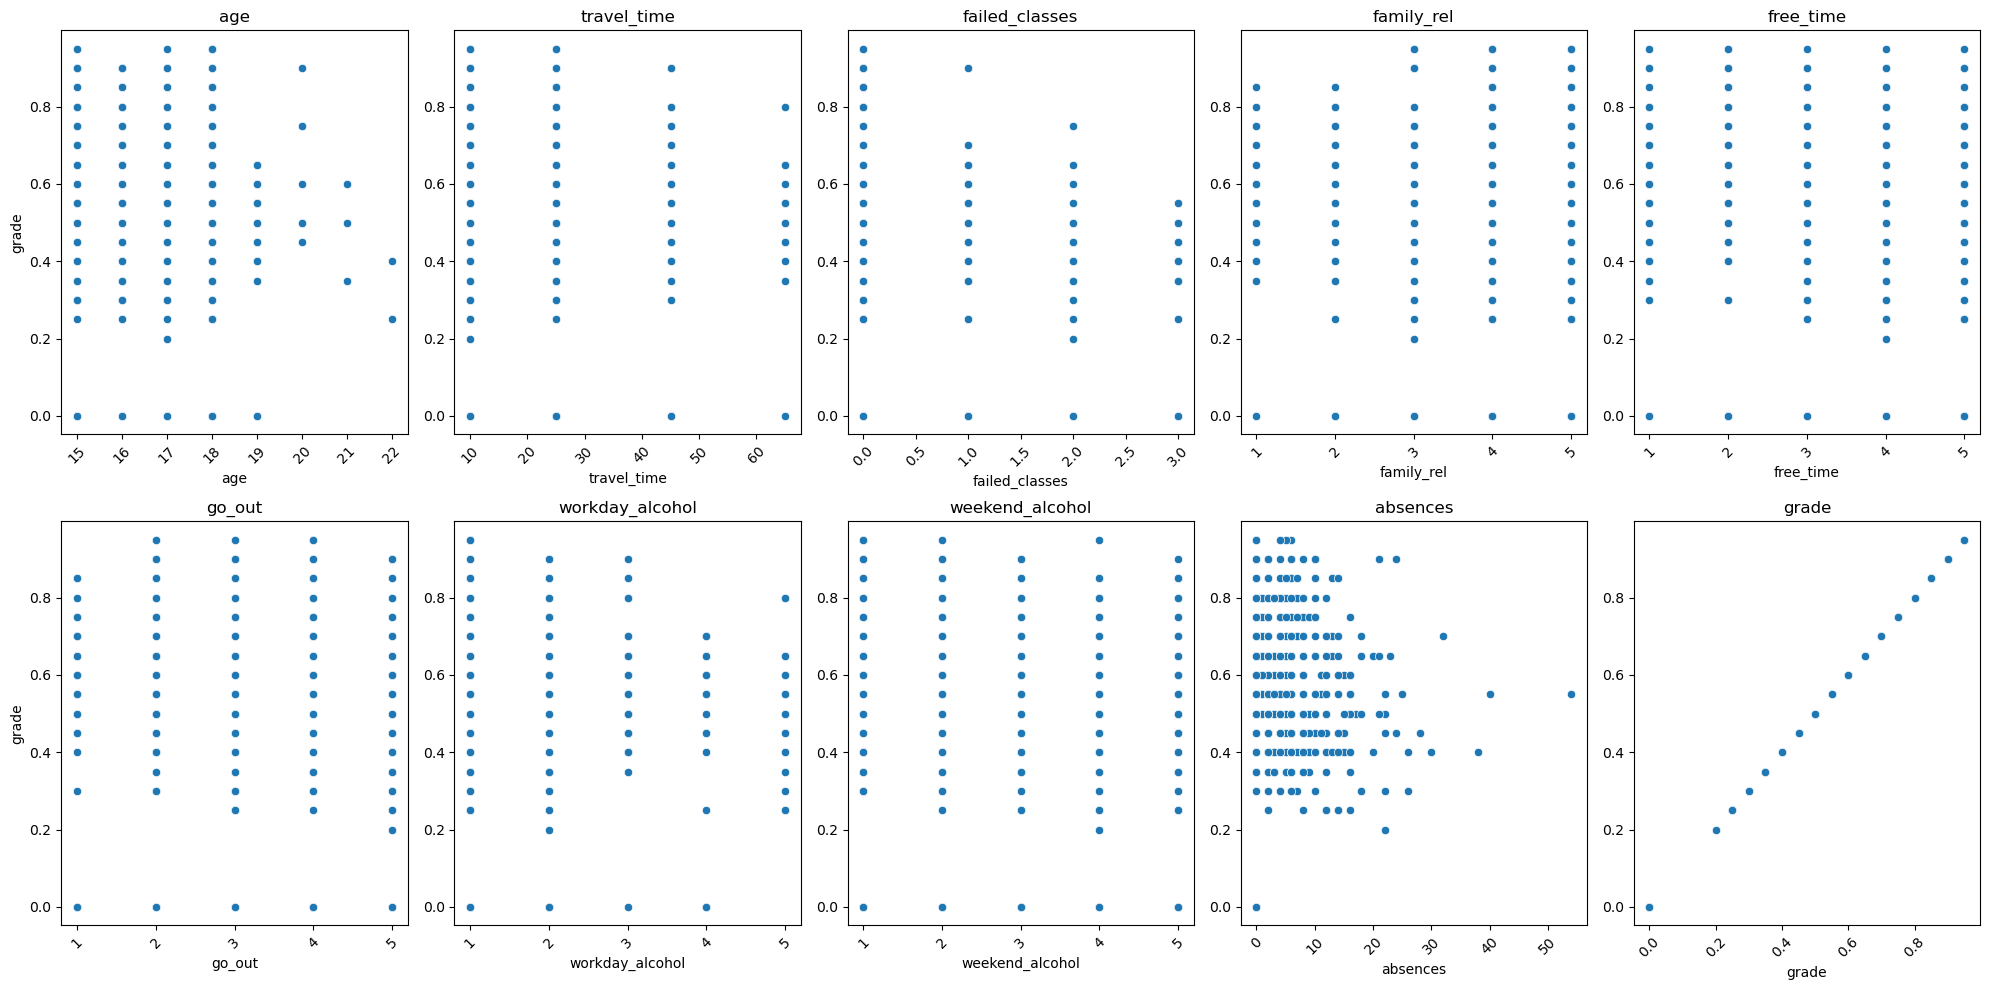

In [11]:
train.hist(figsize=(20, 10))

for i, column in enumerate(num_var):
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x=column, y='grade', data=train)
    plt.title(column)
    plt.xticks(rotation=45)
    if i % 5 != 0:
        plt.ylabel('')

plt.tight_layout()

plt.savefig('num_vs_grade_visual.png')

plt.show() #it seems absences has relationship with grade

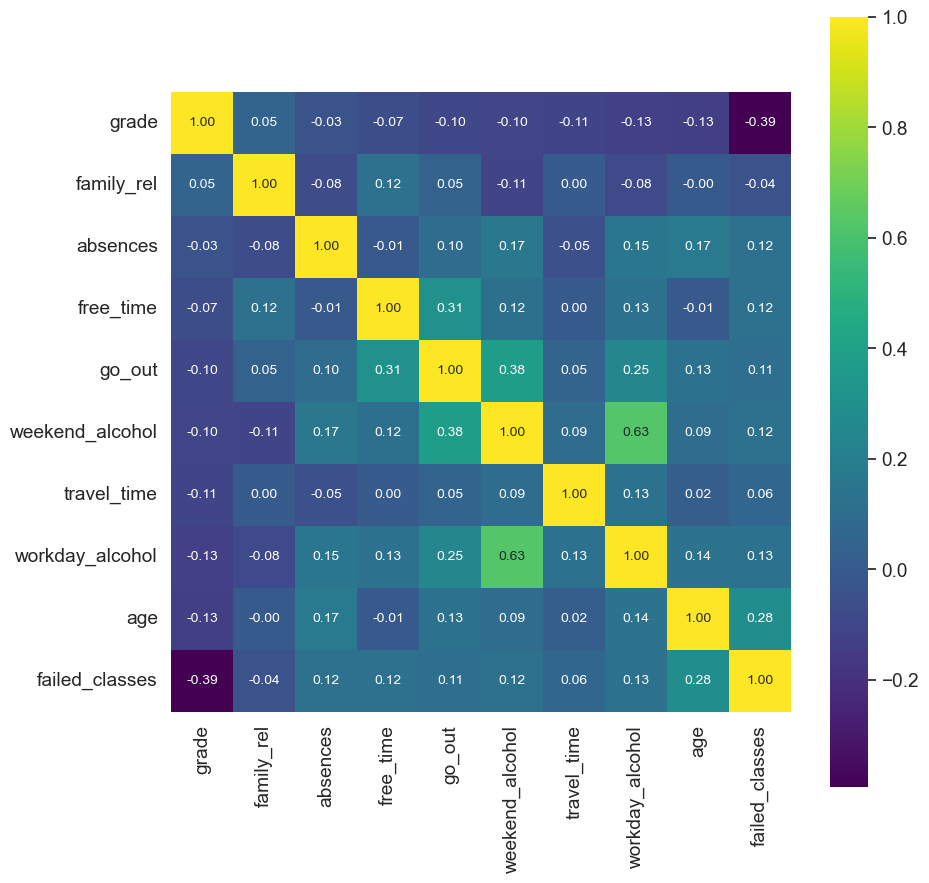

In [12]:
# check correlation between numeric variables

plt.figure(figsize=(10, 10))

k = 10

corr = train.select_dtypes(include = ['float64','int64']).corr()

cols = corr.nlargest(k, 'grade')['grade'].index

cm = np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)

plt.savefig('num_corr.png')

plt.show()

## Categorical variables

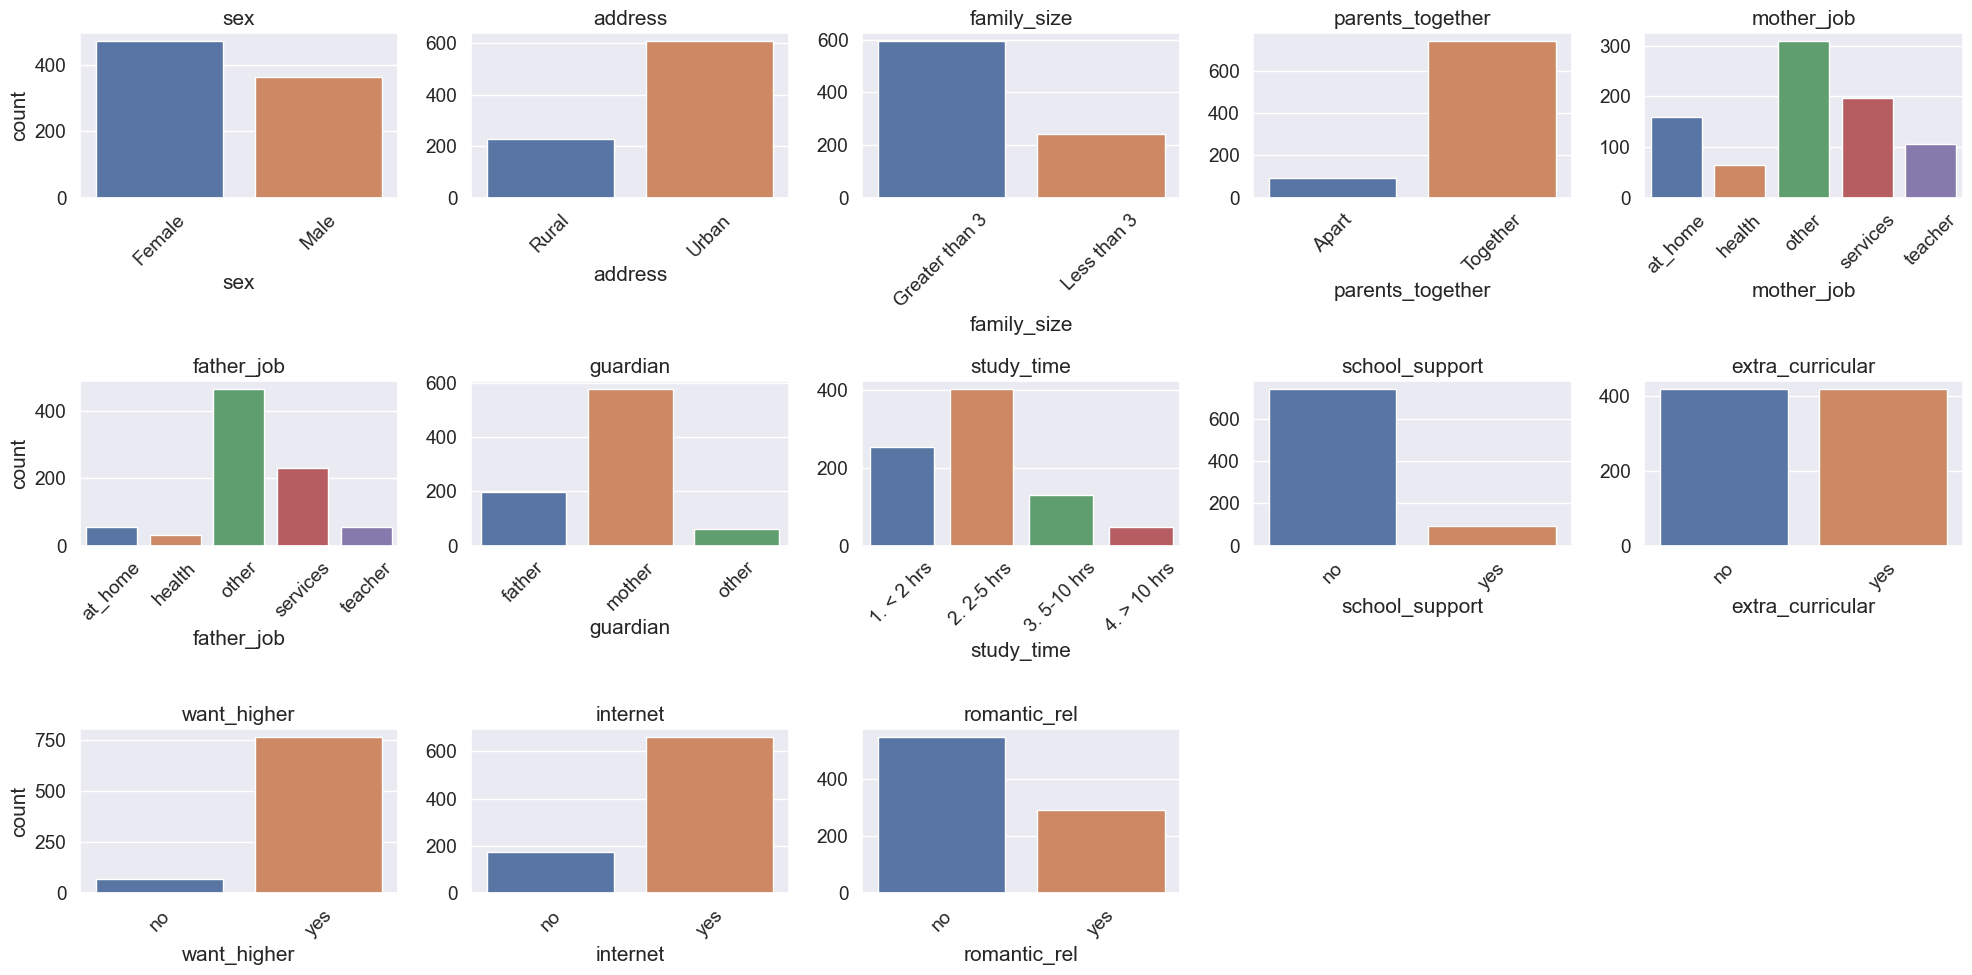

In [13]:
plt.figure(figsize=(20, 10))

cate_var = ['sex', 'address', 'family_size', 'parents_together', 'mother_job',
            'father_job', 'guardian', 'study_time', 'school_support', 'extra_curricular',
             'want_higher', 'internet', 'romantic_rel'] 

for i, column in enumerate(cate_var):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=column, data=train)
    plt.title(column)
    plt.xticks(rotation=45)
    if i % 5 != 0:
        plt.ylabel('')

plt.tight_layout()

plt.savefig('cate_visual.png')

plt.show()

# data unbalance => need scaled later

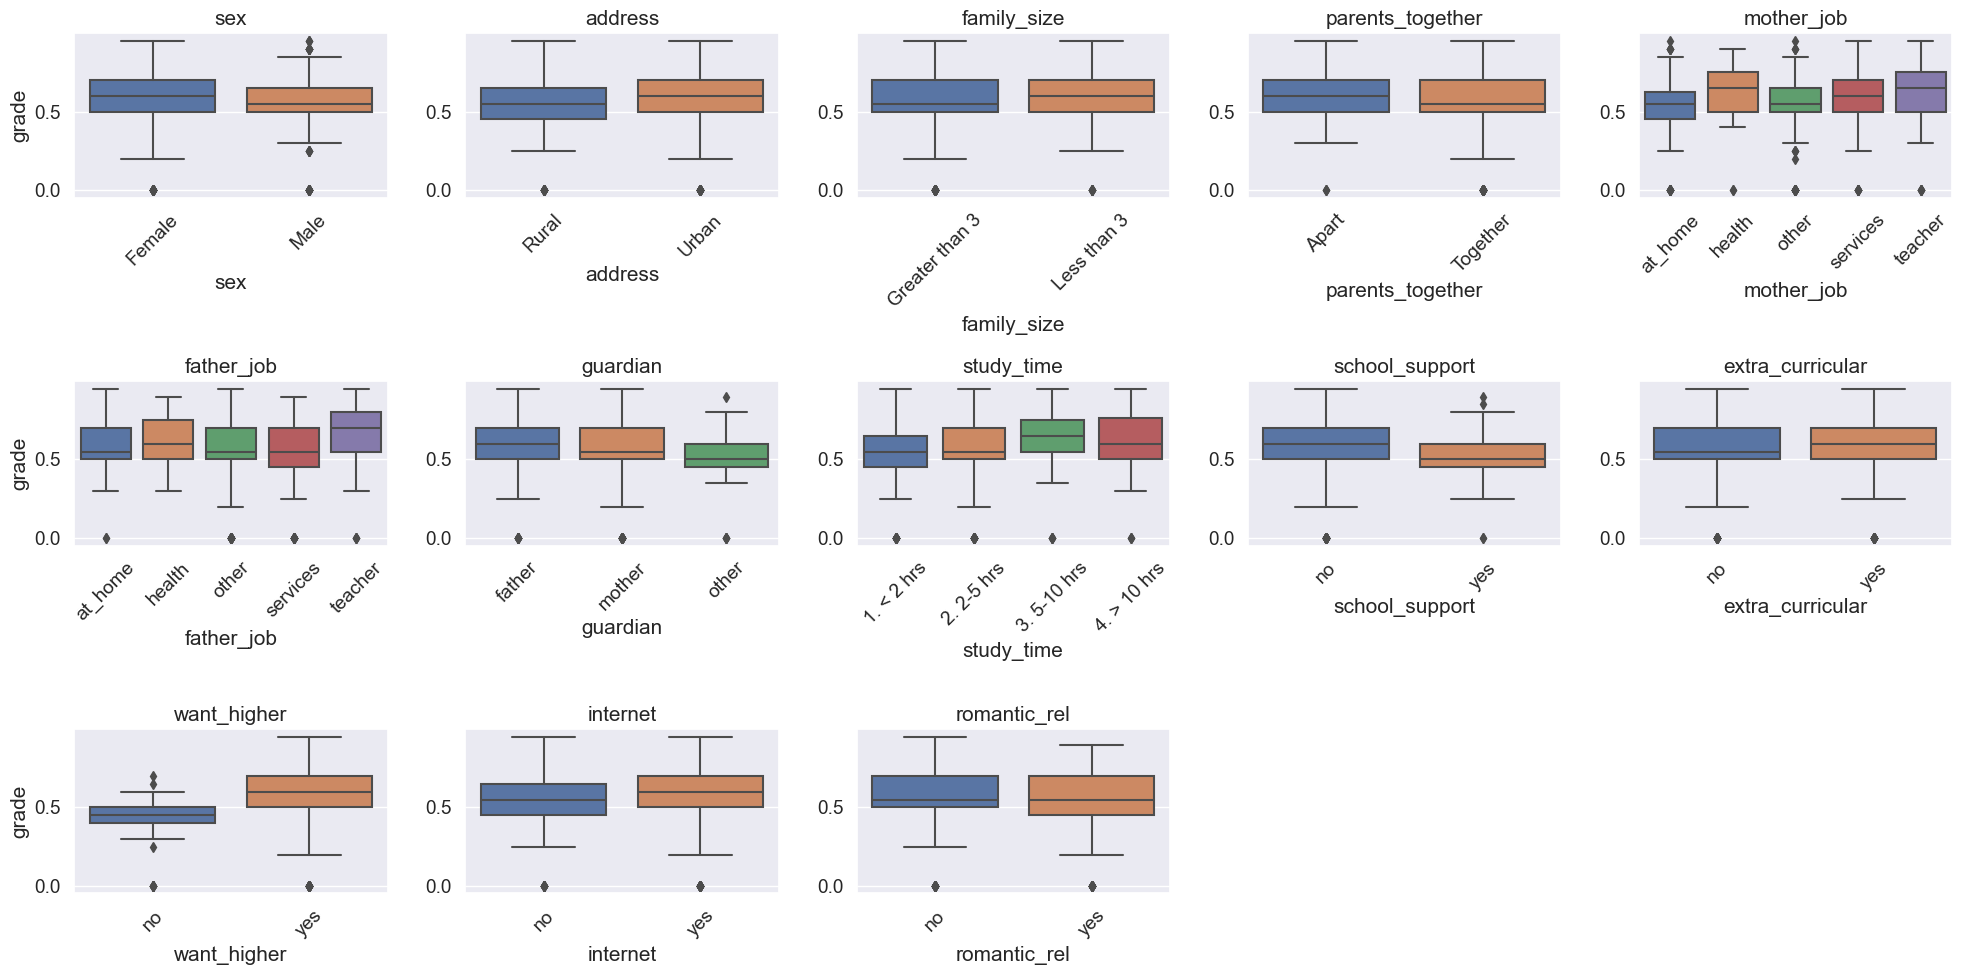

In [14]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cate_var):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=column, y='grade', data=train)
    plt.title(column)
    plt.xticks(rotation=45)
    if i % 5 != 0: 
        plt.ylabel('')

plt.tight_layout()

plt.savefig('cate_vs_grade_visual.png')

plt.show() # seems grade is influenced by mother/father job, school support, extra curricular, want higher education

# Tidy data for model

In [16]:
# encode
from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    return le.fit_transform(a)

train_encoded = train.copy()

for i in cate_var:
    train_encoded[i] = label_encoder(train_encoded[i])

In [17]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               835 non-null    int64  
 1   age               835 non-null    int64  
 2   address           835 non-null    int64  
 3   family_size       835 non-null    int64  
 4   parents_together  835 non-null    int64  
 5   mother_job        835 non-null    int64  
 6   father_job        835 non-null    int64  
 7   guardian          835 non-null    int64  
 8   travel_time       835 non-null    int64  
 9   study_time        835 non-null    int64  
 10  failed_classes    835 non-null    int64  
 11  school_support    835 non-null    int64  
 12  extra_curricular  835 non-null    int64  
 13  want_higher       835 non-null    int64  
 14  internet          835 non-null    int64  
 15  romantic_rel      835 non-null    int64  
 16  family_rel        835 non-null    int64  
 1

In [18]:
# scaled & centered data for features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_features = train_encoded.drop(['grade'], axis=1).columns

scaler.fit(train_encoded[all_features])

scaled_features = scaler.transform(train_encoded[all_features])

train_scaled = pd.DataFrame(scaled_features, columns = all_features)

train_scaled.head()

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,extra_curricular,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences
0,-0.879104,1.005647,0.611028,-0.636965,-2.824623,-1.614352,1.997355,0.304647,0.524892,0.037517,...,-0.998803,0.307188,-1.935024,-0.729459,0.070284,-0.213005,0.730500,-0.547107,-1.002026,0.302080
1,1.137522,-0.586230,0.611028,-0.636965,0.354030,-0.819081,-0.270206,-1.579649,-0.660730,0.037517,...,1.001198,0.307188,0.516789,-0.729459,0.070284,-1.190255,0.730500,0.527797,1.300795,-0.395188
2,1.137522,-1.382169,0.611028,-0.636965,0.354030,-0.023810,1.997355,-1.579649,0.524892,0.037517,...,1.001198,0.307188,-1.935024,-0.729459,0.070284,0.764244,-0.137164,-0.547107,-1.002026,-0.395188
3,1.137522,-0.586230,0.611028,1.569946,0.354030,-0.023810,-0.270206,0.304647,-0.660730,0.037517,...,1.001198,0.307188,0.516789,1.370879,0.070284,-1.190255,-0.137164,-0.547107,-0.234419,-0.743821
4,-0.879104,0.209708,0.611028,1.569946,0.354030,0.771460,0.863574,-1.579649,-0.660730,2.447241,...,1.001198,0.307188,0.516789,1.370879,-0.996753,0.764244,-1.872491,-0.547107,-1.002026,-0.743821


# Modelling


Choose Random Forest (RF) because this dataset has multiple features and potential correlations among them for several reasons:
* Non-linear relationships between features and the target variable
* Less prone to overfitting
* Provides a measure of feature importance, which can help to understand which features are most influential to predict grade
* Works well with large datasets due to its ability to parallelize training.

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = np.array(train_scaled)  # predictors
y = np.array(train_encoded['grade'])  # target

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=27)  # 5-fold cross-validation

rmse_rf_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize an Random Forest model
    rf_model = RandomForestRegressor(random_state = 27)
    # Fit the regressor to the training set
    rf_model.fit(X_train, y_train)

    # Predicting the model
    rf_preds = rf_model.predict(X_test)

    # Compute and append the root mean squared error
    rmse_rf = mean_squared_error(y_test, rf_preds, squared=False)
    rmse_rf_scores.append(rmse_rf)

# Evaluation

In [20]:
# Calculate the average MSE over all folds
avg_rmse_rf = np.mean(rmse_rf_scores)

print(f'The average of RMSE score of Random Forest is: {avg_rmse_rf}')

The average of RMSE score of Random Forest is: 0.17249816580228122


RMSE is a measure of the differences between predicted values by the model and the actual observed values - approximately 0.1726 suggests the model's predictions are off by about 0.1726 units from the actual target values.

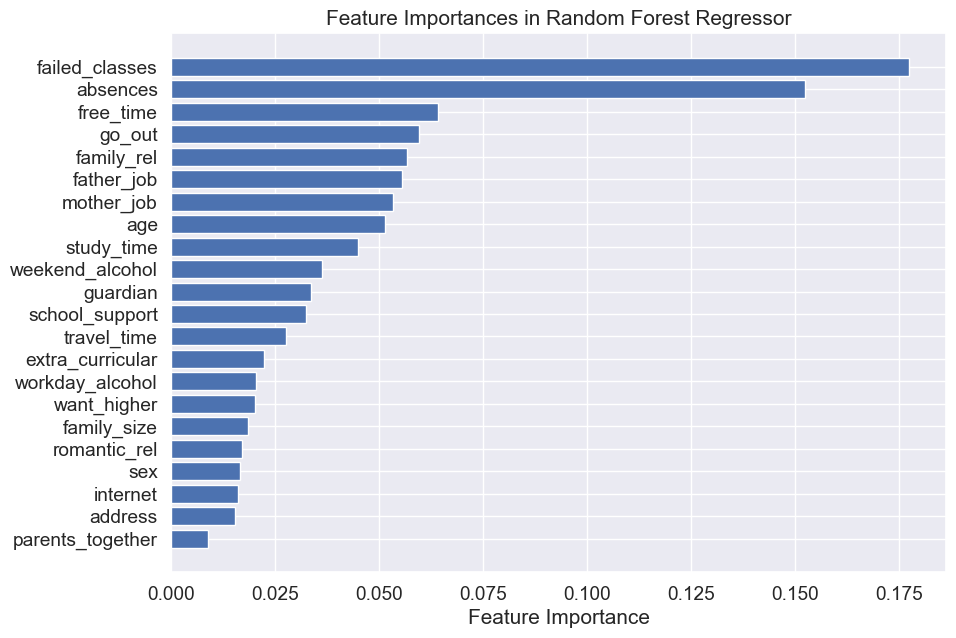

In [22]:
# Check the importances of feature
feature_names = train_encoded.columns

feature_impt = rf_model.feature_importances_

feature_sorted = np.argsort(feature_impt)[::-1]

plt.figure(figsize=(10, 7))

plt.barh(range(len(feature_sorted)), [feature_impt[i] for i in feature_sorted], align='center')

plt.yticks(range(len(feature_sorted)), [feature_names[i] for i in feature_sorted])

plt.gca().invert_yaxis()

plt.title("Feature Importances in Random Forest Regressor")

plt.xlabel("Feature Importance")

plt.savefig('feature_importances.png')

plt.show()

# Additional tips

1. Identify categorical and numerical data correctly.  
2. Creating plots can be easy, but study the plots carefully to derive presentable insights. 
3. Identify the best method to show what information you want to convey and then apply it.
3. Preprocess data using any of the various encoding and scaling methods before applying a model to predict the grade. Hint: Preprocessing a lot of columns can require a lot of different encoders! Maybe scikit-learn has something that can process all columns ;)
4. When modelling, remember to use cross validation.  
5. You can always go back to data preprocessing and EDA if the model doesn't perform well.  
6. Models can sometimes require hyperparameter optimization to perform well.  

Great, you're all set to go! 